# Digit Recognition Using SVM
# Author : Jagdish Mirchandani

## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# load the dataset
train = pd.read_csv("F:/train.csv")

In [2]:
# about the dataset

# dimensions
print("Dimensions: ", train.shape, "\n")

# data types
print(train.info())

# head
train.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# lets check the unique labels in the dataset
order = list(np.sort(train['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


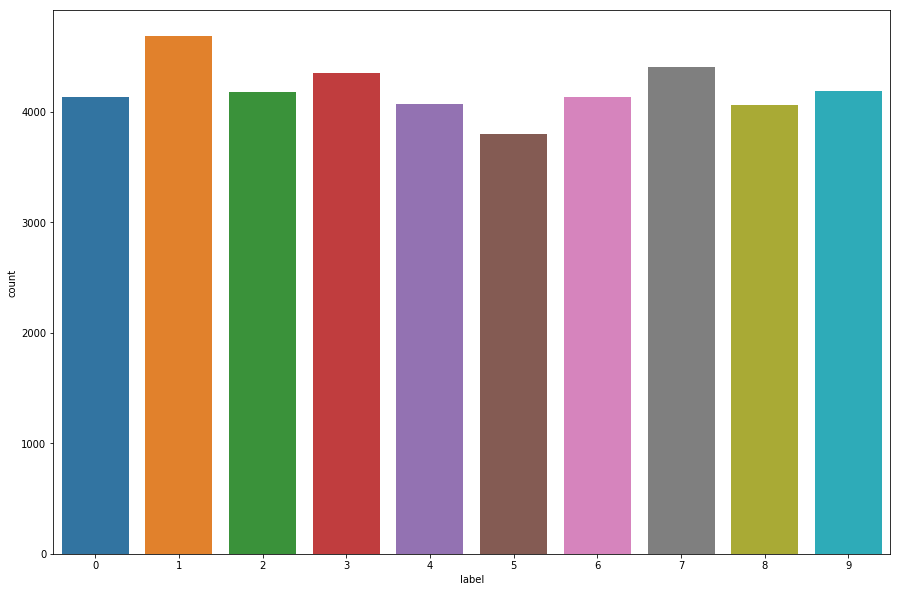

In [4]:
# lets draw count plot on the whole dataset
fig = plt.figure(figsize = (15,10))
sns.countplot(train['label'])
plt.show()

# Observation: Selection is little biased towards digit 1 and the sample count for label 1 is around 30% higher than digit 5.

## Data Preparation

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to **rescale** the features, since they may have varying ranges. For example, here are the average values:

In [5]:
# average feature values
round(train.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [6]:
# splitting into X and y
X = train.drop("label", axis = 1)
y = train['label']

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

In [7]:
# lets take 20% of the data for training purpose and 80% for testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 0)

In [8]:
# lets apply standard scalar on the splitted dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [9]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [10]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9106845238095238 

[[3207    0    9    8   11   32   27    0   10    1]
 [   0 3664   12   11    5    8    6   10   33    2]
 [  41   19 3025   48   37   23   38   28   43    5]
 [  14   14  114 3064    9  156    7   22   68   29]
 [   7   14   28    0 3045    6   27   13    4  126]
 [  58   29   24  115   37 2649   32    6   76   20]
 [  45    1   45    0   24   43 3111    2   14    1]
 [   9   27   44   29   62   10    2 3225    6  107]
 [  37   78   74  159   22   92   24    9 2756   29]
 [  19   18   17   43  174   25    0  165   23 2853]]


The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [11]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [12]:
# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[3218    0   30    4    5    9   23    1   15    0]
 [   0 3665   31    9    6    9   11    3   15    2]
 [  19    7 3143   29   24    7   16   30   28    4]
 [   5   12   81 3214    4   85    6   35   38   17]
 [   4    9   55    2 3079    8   16   23    5   69]
 [   9    7   44   66   20 2824   37    4   23   12]
 [  24    2   57    0   11   34 3145    2   11    0]
 [   7   24   93    9   25    2    0 3288    4   69]
 [  13   35   51   50   14   58   20   11 3007   21]
 [  12   10   41   55   63    9    0  117   25 3005]]


In [13]:
# accuracy, precision and Recall
print("accuracy", metrics.accuracy_score(y_test, y_pred))

print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label ='positive',
                                           average ='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label ='positive',
                                           average ='micro'))

accuracy 0.9401190476190476
Precision Score :  0.9401190476190476
Recall Score :  0.9401190476190476


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


The non-linear model gives approx. 94% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [14]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)               


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [15]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,120.623119,0.500174,14.553143,0.070077,1,0.01,"{'C': 1, 'gamma': 0.01}",0.742262,0.726190,0.730357,...,0.738452,0.009149,12,0.999554,0.999554,0.999256,0.999702,0.999256,0.999464,0.000179
1,30.777764,0.730233,8.635474,0.103809,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.918452,0.930357,...,0.928095,0.005461,4,0.971429,0.972173,0.970387,0.970536,0.971726,0.971250,0.000688
2,43.781001,0.158080,11.687739,0.097165,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.883333,0.903571,...,0.899405,0.009229,8,0.911905,0.915625,0.912500,0.914732,0.915030,0.913958,0.001474
3,123.498621,1.514014,14.498068,0.135141,10,0.01,"{'C': 10, 'gamma': 0.01}",0.763690,0.742262,0.754167,...,0.758333,0.010255,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,24.454289,0.172897,7.685696,0.076529,10,0.001,"{'C': 10, 'gamma': 0.001}",0.948214,0.934524,0.939881,...,0.941190,0.004632,1,0.999256,0.999107,0.999107,0.999405,0.998958,0.999167,0.000152
5,19.525208,0.350526,7.250644,0.271783,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.938095,0.911905,0.925595,...,0.926190,0.008837,5,0.957887,0.959970,0.958631,0.959077,0.959524,0.959018,0.000720
6,127.115717,4.604170,15.211977,0.684067,100,0.01,"{'C': 100, 'gamma': 0.01}",0.763690,0.742262,0.754167,...,0.758333,0.010255,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,27.557635,2.195472,8.846887,0.596383,100,0.001,"{'C': 100, 'gamma': 0.001}",0.947619,0.931548,0.938095,...,0.939762,0.005576,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,16.545161,1.250832,6.257095,0.206908,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.926786,0.914286,0.925595,...,0.925833,0.006988,6,0.991667,0.993750,0.994196,0.994048,0.993452,0.993423,0.000914
9,140.669350,3.790225,15.760884,0.321089,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.763690,0.742262,0.754167,...,0.758333,0.010255,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


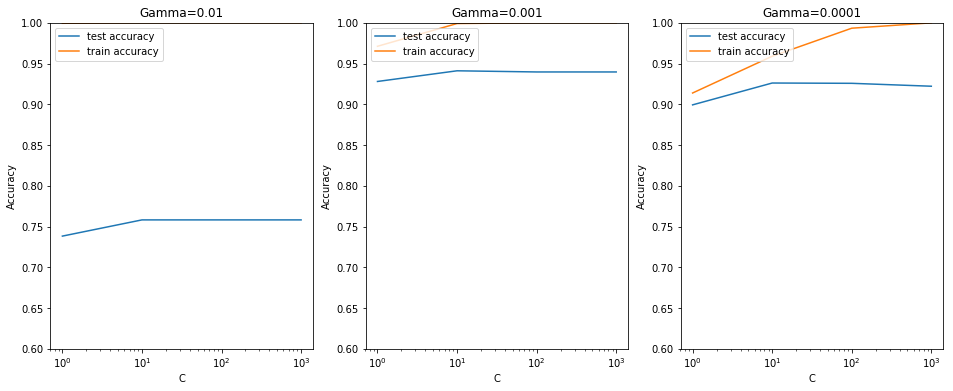

In [16]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


Observations from the above plots:
- Non-linear models does not do well with high values of gamma
- Low value of C with low value of gamma leads to better performance

# Let's now choose the best hyperparameters. 

In [17]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9411904761904762 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [18]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
model_acc = model.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred)
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [22]:
print('\nSVM Trained Model Accuracy: ', model_acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Model on Validation Images: ',test_acc)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Model Accuracy:  0.947827380952381

Predicted Values:  [3 6 9 ... 4 8 3]

Accuracy of Model on Validation Images:  0.947827380952381

Confusion Matrix: 
 [[3227    0   24    4    6   10   18    2   13    1]
 [   0 3677   28    6    6    2   10   10   10    2]
 [  15    6 3165   29   22    8   20   24   16    2]
 [   2    7   67 3260    5   76    5   27   31   17]
 [   6   10   42    1 3102    8   16   17    4   64]
 [  14    8   27   71   14 2836   32    6   25   13]
 [  35    1   48    0   10   30 3151    1   10    0]
 [   6   23   69    8   27    2    1 3326    6   53]
 [  19   26   52   48   13   57   18    5 3028   14]
 [  13   13   31   37   63   13    1   77   14 3075]]


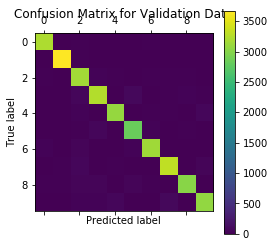

In [23]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Grid Search: Hyperparameter Tuning

Let's now try polynomial model with different values of C and gamma and try to find out the best parameters

In [24]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2, 1e-3],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 39.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.1, 0.01, 0.001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [25]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,70.709269,1.366030,12.396275,0.171250,1,0.1,"{'C': 1, 'gamma': 0.1}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,69.922027,1.223022,12.675585,0.242302,1,0.01,"{'C': 1, 'gamma': 0.01}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,134.597261,0.509562,20.493207,0.579094,1,0.001,"{'C': 1, 'gamma': 0.001}",0.735119,0.710119,0.736905,...,0.733571,0.013545,12,0.784970,0.776339,0.780506,0.785863,0.785714,0.782679,0.003729
3,70.359896,1.716785,12.670420,0.407969,10,0.1,"{'C': 10, 'gamma': 0.1}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,73.957205,1.432664,14.317894,1.052657,10,0.01,"{'C': 10, 'gamma': 0.01}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,86.140173,2.004558,14.923224,0.176135,10,0.001,"{'C': 10, 'gamma': 0.001}",0.932143,0.912500,0.924405,...,0.924286,0.007117,11,0.979018,0.979762,0.979167,0.979464,0.980357,0.979554,0.000476
6,76.596499,3.574693,15.415309,1.673575,100,0.1,"{'C': 100, 'gamma': 0.1}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,75.811117,2.132926,13.401426,0.315788,100,0.01,"{'C': 100, 'gamma': 0.01}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,74.112236,2.069895,13.830817,0.353186,100,0.001,"{'C': 100, 'gamma': 0.001}",0.957143,0.937500,0.945238,...,0.949524,0.007486,10,0.999554,0.999405,0.999405,0.999554,0.999107,0.999405,0.000163
9,75.246669,2.635438,14.457847,0.444605,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.955952,0.936905,0.946429,...,0.949643,0.007392,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


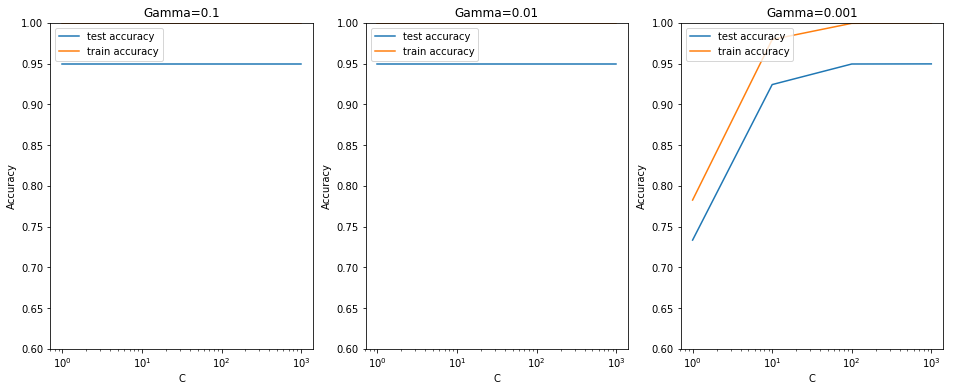

In [26]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_010 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_010["param_C"], gamma_010["mean_test_score"])
plt.plot(gamma_010["param_C"], gamma_010["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


From the above graphs, we can see that value of C do not matter in when the value of gamma is high

In [27]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9496428571428571 corresponding to hyperparameters {'C': 1, 'gamma': 0.1}


In [28]:
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='poly', random_state = 0)
classifier.fit(X_train,y_train)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
model_acc = classifier.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)

In [32]:
print('\nSVM Trained Classifier Accuracy: ', model_acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.955297619047619

Predicted Values:  [3 6 9 ... 4 8 3]

Accuracy of Classifier on Validation Images:  0.955297619047619

Confusion Matrix: 
 [[3227    0   10    2   10   16   18    0   20    2]
 [   1 3687   16    5    8    1   11    7   12    3]
 [  25    6 3099   26   31    3    4   18   86    9]
 [   1    1   34 3277    4   59    3   21   77   20]
 [   7    5   10    1 3171    4    8    3    6   55]
 [   3    1    3   44   12 2884   28    4   46   21]
 [  20    1   14    0   21   30 3168    1   31    0]
 [   5   10   19    4   55    0    0 3323   13   92]
 [  13    7   12   25   10   44    4    5 3146   14]
 [  12    5    5   31   74   11    0   56   27 3116]]


In [34]:
# So, we are getting 95% accuracy with polynomial model of degree 3, which is slightly higher than what we achieved through
# RBF model

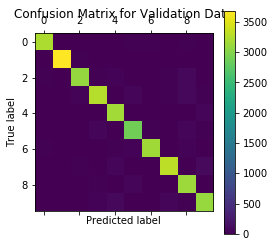

In [33]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Conclusion

1. The accuracy achieved using linear model : 91%
2. Accuracy with non linear model using RBF kernel : 94%
3. Accuracy with non linear, degree 3 polynomial : 95.5 %

I would like to go with RBF model as it has a decent accuracy and it seems to be simpler than degree 3 polynomial model